In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
df = pd.read_csv(r'C:\Users\ayesh\Documents\intership 2nd task\Loan_Data.csv')  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Show missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


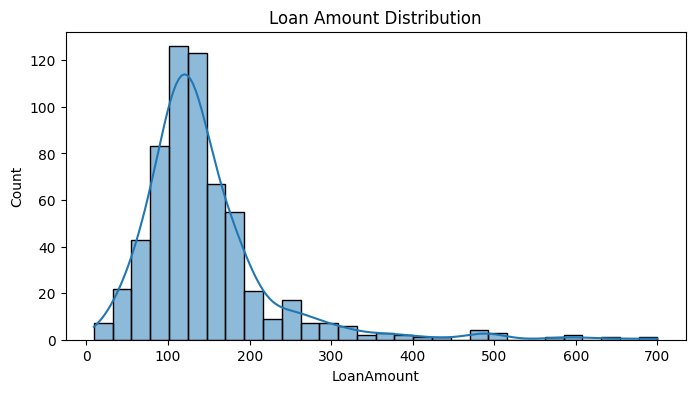

In [6]:
#loan amount distribution:
plt.figure(figsize=(8, 4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

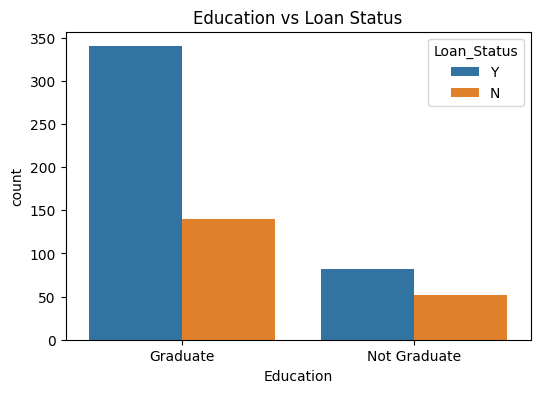

In [7]:
#education vs loan status:
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()


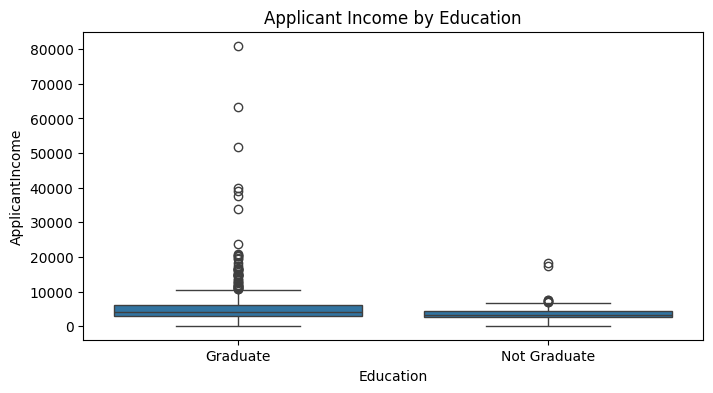

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Education")
plt.show()


In [9]:
#encode categorical values:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])


In [ ]:
#Select features and target 
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

 Logistic Regression Accuracy: 0.7886178861788617


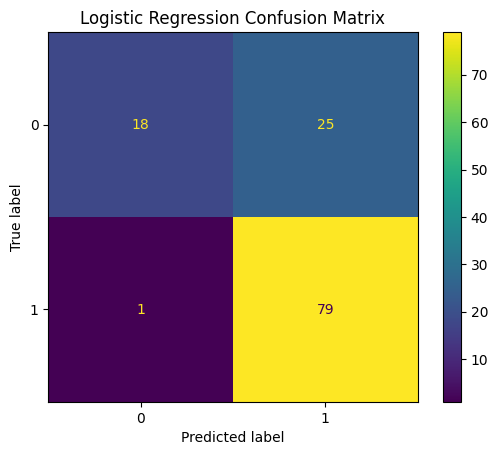

In [13]:
#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print(" Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, log_preds)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()